## Importing Libraries

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [97]:
hdb_resale_od = r"C:\Users\fizah\Documents\WordPress Site\Data Analyst Site\hdb_main_data.csv"
df_hdb_resale_price = pd.read_csv(hdb_resale_od)

In [99]:
print(df_hdb_resale_price.head())

     month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
0            44.0        Improved                 1979  61 years 04 months   
1            67.0  New Generation                 1978  60 years 07 months   
2            67.0  New Generation                 1980  62 years 05 months   
3            68.0  New Generation                 1980   62 years 01 month   
4            67.0  New Generation                 1980  62 years 05 months   

   resale_price  
0      232000.0  
1      250000.0  
2      262000.0  
3      265000.

### View information on the Dataset

In [102]:
df_hdb_resale_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198412 entries, 0 to 198411
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                198412 non-null  object 
 1   town                 198412 non-null  object 
 2   flat_type            198412 non-null  object 
 3   block                198412 non-null  object 
 4   street_name          198412 non-null  object 
 5   storey_range         198412 non-null  object 
 6   floor_area_sqm       198412 non-null  float64
 7   flat_model           198412 non-null  object 
 8   lease_commence_date  198412 non-null  int64  
 9   remaining_lease      198412 non-null  object 
 10  resale_price         198412 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.7+ MB


In [104]:
df_hdb_resale_price.shape

(198412, 11)

In [106]:
df_hdb_resale_price.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


### Check if there are null values

In [109]:
df_hdb_resale_price.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

### Check if there are duplicate values

In [112]:
duplicates = df_hdb_resale_price[df_hdb_resale_price.duplicated()]

#total count of duplicate rows in the DataFrame
print('Duplicates:', len(duplicates))

#print the duplicate rows
print(duplicates)

Duplicates: 297
          month          town flat_type block        street_name storey_range  \
243     2017-01   BUKIT MERAH    4 ROOM   106     HENDERSON CRES     07 TO 09   
305     2017-01  CENTRAL AREA    3 ROOM   271           QUEEN ST     16 TO 18   
510     2017-01   JURONG EAST    4 ROOM   265        TOH GUAN RD     04 TO 06   
591     2017-01   JURONG WEST    4 ROOM  337A       TAH CHING RD     19 TO 21   
672     2017-01     PASIR RIS    4 ROOM   753    PASIR RIS ST 71     01 TO 03   
...         ...           ...       ...   ...                ...          ...   
188194  2024-10      SENGKANG    4 ROOM  329B      ANCHORVALE ST     10 TO 12   
189467  2024-05      SENGKANG    5 ROOM  430D      FERNVALE LINK     19 TO 21   
191070  2024-12      TAMPINES    4 ROOM  612A  TAMPINES NTH DR 1     10 TO 12   
195945  2024-01        YISHUN    4 ROOM  462C       YISHUN AVE 6     01 TO 03   
197429  2025-01       GEYLANG    4 ROOM   82B         CIRCUIT RD     19 TO 21   

        flo

### Remove the duplicate values and modify the original DataFrame

In [115]:
#creating a new DataFrame without duplicates while keeping the first occurence
df_hdb_resale_price_no_duplicates = df_hdb_resale_price.drop_duplicates(keep='first')

In [117]:
df_hdb_resale_price.shape

(198412, 11)

### Creating a new column; address by combininig block and street_name

In [120]:
df_hdb_resale_price['address'] = df_hdb_resale_price['block'] + ' ' + df_hdb_resale_price['street_name']

In [122]:
print(df_hdb_resale_price)

          month        town  flat_type block        street_name storey_range  \
0       2017-01  ANG MO KIO     2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1       2017-01  ANG MO KIO     3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2       2017-01  ANG MO KIO     3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3       2017-01  ANG MO KIO     3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4       2017-01  ANG MO KIO     3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   
...         ...         ...        ...   ...                ...          ...   
198407  2025-01      YISHUN     5 ROOM  502B       YISHUN ST 51     07 TO 09   
198408  2025-01      YISHUN     5 ROOM   871       YISHUN ST 81     07 TO 09   
198409  2025-01      YISHUN     5 ROOM   851       YISHUN ST 81     10 TO 12   
198410  2025-01      YISHUN  EXECUTIVE   352     YISHUN RING RD     04 TO 06   
198411  2025-01      YISHUN  EXECUTIVE   614       YISHUN ST 61     04 TO 06   

        floor_area_sqm      flat_model 

### Grouping the town by region

By referencing both the HDB website (https://www.hdb.gov.sg/about-us/history/hdb-towns-your-home) and https://www.propertyguru.com.sg/singapore-property-listing/hdb/kallang-whampoa, I categorize the towns by region. This classification will be beneficial for analyzing market trends and will help in understanding how different areas influence the housing market.

**Function for categorizing the town into different regions based on its name**

In [127]:
def get_region(town):
    # Define a dictionary mapping towns to their respective regions
    regions = {
        'CENTRAL REGION': ['BISHAN', 'BUKIT MERAH', 'GEYLANG', 'KALLANG', 
                           'MARINE PARADE', 'QUEENSTOWN', 'KALLANG/WHAMPOA', 
                           'BUKIT TIMAH', 'CENTRAL AREA', 'TOA PAYOH'],
        'EAST REGION': ['BEDOK', 'CHANGI', 'CHANGI BAY', 'PAYA LEBAR', 
                        'PASIR RIS', 'TAMPINES'],
        'NORTH REGION': ['MANDAI', 'LIM CHU KANG', 'SEMBAWANG', 'SIMPANG', 
                         'SUNGEI KADUT', 'WOODLANDS', 'YISHUN'],
        'NORTH-EAST REGION': ['ANG MO KIO', 'HOUGANG', 'PUNGGOL', 
                              'SELETAR', 'SENGKANG', 'SERANGOON'],
        'WEST REGION': ['BUKIT BATOK', 'BUKIT PANJANG', 'BOON LAY', 
                        'PIONEER', 'CHOA CHU KANG', 'CLEMENTI', 
                        'JURONG EAST', 'JURONG WEST', 'TENGAH', 'TUAS', 
                        'WESTERN ISLANDS', 'BENOI', 'GHIM MOH', 
                        'PANDAN GARDENS', 'JURONG ISLAND', 'KENT RIDGE', 
                        'NANYANG', 'PASIR LABA', 'TEBAN GARDENS', 
                        'TOH TUCK', 'TUAS SOUTH', 'WEST COAST']
    }
    
    # Normalize the town name to upper case for comparison
    town = town.upper()

    # Loop through the dictionary to find the region
    for region, towns in regions.items():
        if town in towns:
            return region
            
    return 'OTHER'

In [129]:
# Apply the function to the 'town' column and create a new 'region' column
df_hdb_resale_price['region'] = df_hdb_resale_price['town'].apply(get_region)

In [131]:
print(df_hdb_resale_price.head(20))

      month        town flat_type block        street_name storey_range  \
0   2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1   2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2   2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3   2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4   2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   
5   2017-01  ANG MO KIO    3 ROOM   150   ANG MO KIO AVE 5     01 TO 03   
6   2017-01  ANG MO KIO    3 ROOM   447  ANG MO KIO AVE 10     04 TO 06   
7   2017-01  ANG MO KIO    3 ROOM   218   ANG MO KIO AVE 1     04 TO 06   
8   2017-01  ANG MO KIO    3 ROOM   447  ANG MO KIO AVE 10     04 TO 06   
9   2017-01  ANG MO KIO    3 ROOM   571   ANG MO KIO AVE 3     01 TO 03   
10  2017-01  ANG MO KIO    3 ROOM   534  ANG MO KIO AVE 10     01 TO 03   
11  2017-01  ANG MO KIO    3 ROOM   233   ANG MO KIO AVE 3     10 TO 12   
12  2017-01  ANG MO KIO  

**Checking town**

In [134]:
town_name = 'BISHAN'
region = get_region(town_name)
print(f'The town {town_name} is in the {region}.')

The town BISHAN is in the CENTRAL REGION.


### Plotting charts

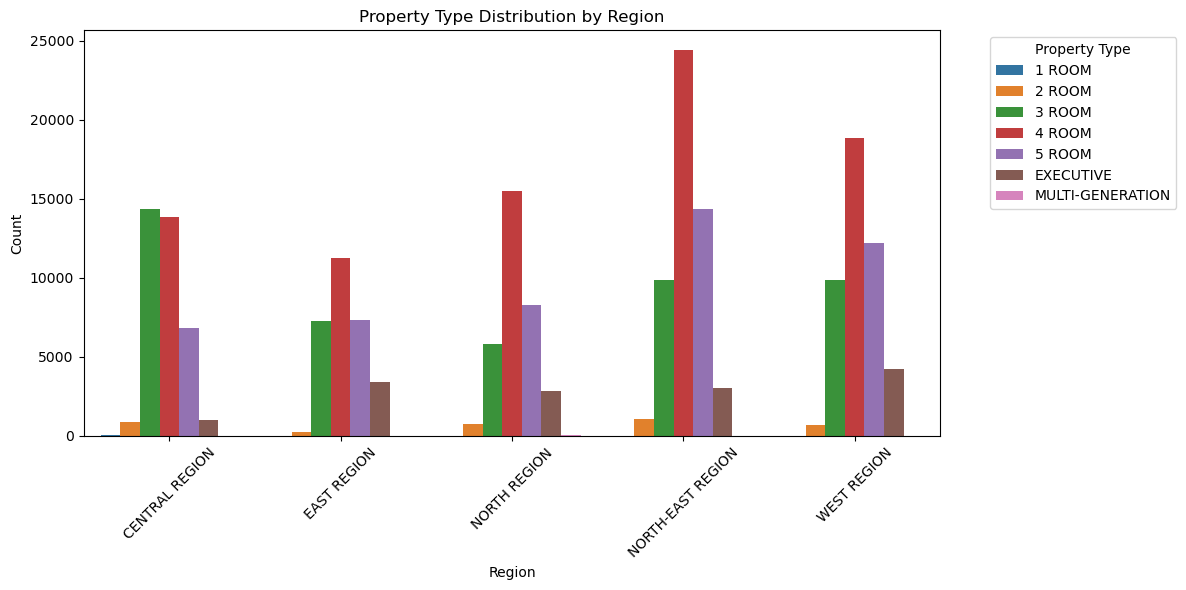

In [137]:
grouped_df = df_hdb_resale_price.groupby(['region', 'flat_type']).size().reset_index(name='count')

# Create a bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='count', hue='flat_type', data=grouped_df)
plt.title('Property Type Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Export the file

In [143]:
ep = r'C:\Users\fizah\Documents\WordPress Site\Data Analyst Site\hdb_region_address.csv'


In [145]:
# Export the dataframe to a CSV file
df_hdb_resale_price.to_csv(ep, index=False)
print(f"Unique addresses exported to '{ep}'")

Unique addresses exported to 'C:\Users\fizah\Documents\WordPress Site\Data Analyst Site\hdb_region_address.csv'


### Showing the uniq address and exporting it
The dataset contains a total of 198412 rows. To retrieve postal codes, latitude, and longitude, I will use the unique function to fetch only distinct values instead of extracting all of them.

In [56]:
# Get unique values of the 'address' column
unique_address = df_hdb_resale_price['address'].unique()

In [58]:
print(unique_address.shape)

(9616,)


In [60]:
# Create a DataFrame from the unique addresses
unique_address_df = pd.DataFrame(unique_address, columns=['unique_address'])

In [72]:
# Define the export path
export_path = r'C:\Users\fizah\Documents\WordPress Site\Data Analyst Site\unique_address.csv'

In [74]:
# Export the DataFrame to a CSV file
unique_address_df.to_csv(export_path, index=False)

print(f"Unique addresses exported to '{export_path}'")

Unique addresses exported to 'C:\Users\fizah\Documents\WordPress Site\Data Analyst Site\unique_address.csv'
